#Вводная часть

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from numpy.random import default_rng
from sklearn.datasets import make_blobs

In [ ]:
cl_std = 0.6
cl_std2 = 2
cl_std3 = 6
n_s = 200
X, y = make_blobs(n_samples=n_s, centers=2, n_features=2, random_state=0, cluster_std=cl_std)

In [ ]:
print(X.shape)

(200, 2)


Выведем первые 5 элементов X и y

In [ ]:
print(X[:5])
print(y[:5])

[[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]
[1 1 1 1 0]



Отобразим в наглядном виде сгенерированные данные с помощью библиотки matplotlib:

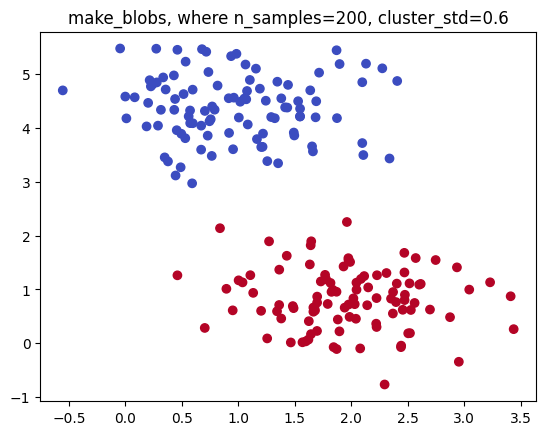

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title(f"make_blobs, where n_samples={n_s}, cluster_std={cl_std}")
plt.show()

Поменяем несколько раз значения переменных и увидим, как будут менятся графики

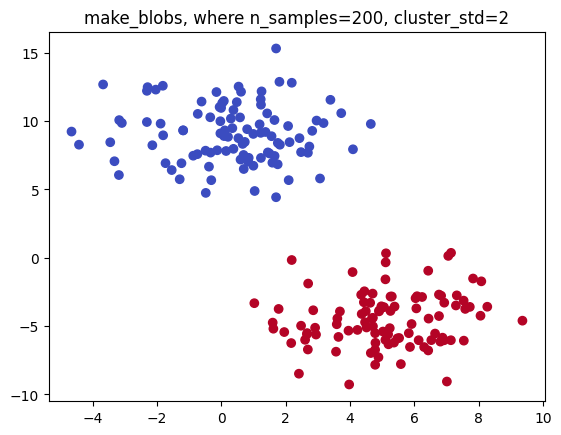

In [ ]:
X, y = make_blobs(n_samples=n_s, n_features=2, centers=2, random_state=23, cluster_std=cl_std2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title(f"make_blobs, where n_samples={n_s}, cluster_std={cl_std2}")
plt.show()

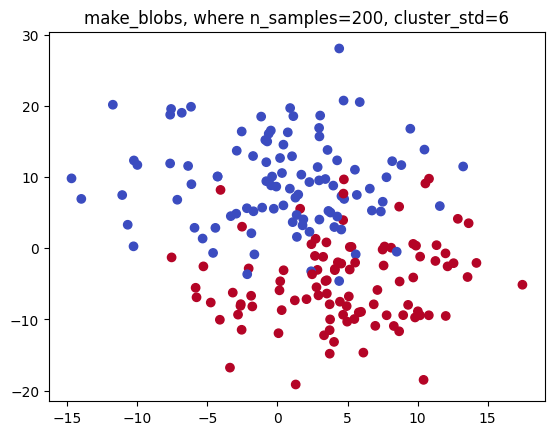

In [ ]:
X, y = make_blobs(n_samples=n_s, n_features=2, centers=2, random_state=23, cluster_std=cl_std3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title(f"make_blobs, where n_samples={n_s}, cluster_std={cl_std3}")
plt.show()

ТТаким образом заметим, что чем больше значение стандартного отклонения (cluster_std), тем сильнее точки рассеиваются 

#Свой метод k-ближайших соседей

Метод classify считает расстояния для всех точек исходных данных, сортирует их по возрастанию, после чего считает колличество экземпляторов каждого класса в первых k расстояний

In [ ]:
class KNeighborsСlassifier:
    def fit(self, data, classes):
        # Инициализация признаков и классов
        self.X = data
        self.y = classes
        
        # Количество уникальных классов
        self.count_classes = classes.max() + 1
        
    def classify(self, x, k, print_distances=False): 
        # Рассчитываем расстояние между вектором признаков x и каждым вектором в тренировочной выборке
        dists = [np.linalg.norm(self.X[i] - x) for i in range(len(self.X))]
        
        # Объединяем расстояния и соответствующие им классы в кортежи, сортируем по расстоянию
        marked_dists = list(zip(dists, self.y))
        marked_dists.sort() 
        
        # Считаем голоса за каждый класс среди k ближайших соседей
        scores = np.zeros(self.count_classes)
        for i in range(k):
            if print_distances:
                # Выводим расстояние до k ближайших соседей
                print(f"dictance to {i + 1} point: {marked_dists[i][0]} (class = {marked_dists[i][1]})")
            scores[marked_dists[i][1]] += 1
            
        # Возвращаем предсказанный класс
        return np.argmax(scores)
    
    def predict(self, X_test, k):
        # Создаем пустой массив для предсказаний
        predictions = np.empty(len(X_test))
        for i in range(len(X_test)):
            # Классифицируем каждую точку в тестовой выборке
            predictions[i] = self.classify(X_test[i], k)
            
        # Возвращаем массив с предсказаниями
        return predictions


In [ ]:
knn = KNeighborsСlassifier()

In [ ]:
knn.fit(X, y)

Создадим 3 тестовых объекта и вернем нормальное значение для cluster_std


In [ ]:
test_dots = [[0, 0],
             [3, 5],
             [1.75, 2.5]]

X, y = make_blobs(n_samples=n_s, centers=2, n_features=2, random_state=0, cluster_std=cl_std)

dictance to 1 point: 1.8528451210884567 (class = 0)
dictance to 2 point: 2.117779877403897 (class = 0)
dictance to 3 point: 2.4910873187644804 (class = 1)
dictance to 4 point: 2.815705316491839 (class = 0)
dictance to 5 point: 2.881065095644771 (class = 1)
dictance to 6 point: 3.0363686536503027 (class = 1)
dictance to 7 point: 3.116470786657004 (class = 1)
dictance to 8 point: 3.257952050985374 (class = 0)
dictance to 9 point: 3.475334506652657 (class = 1)
dictance to 10 point: 3.4959391543561935 (class = 1)
Class of t:  1


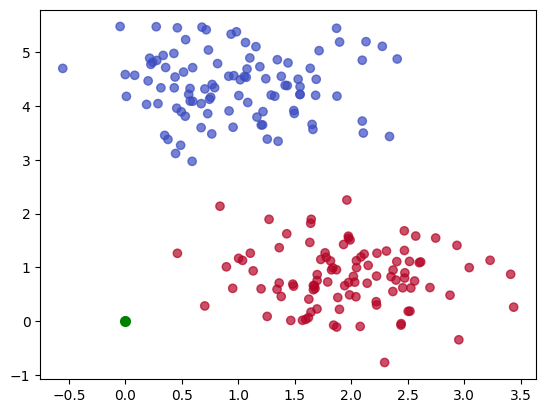

In [ ]:
t = test_dots[0]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(t[0], t[1], c='g', linewidth=2)
print("Class of t: ", knn.classify(t, 10, print_distances=True))

dictance to 1 point: 0.6853053972153716 (class = 0)
dictance to 2 point: 0.7839545498111568 (class = 0)
dictance to 3 point: 0.9654102386622905 (class = 0)
dictance to 4 point: 1.376168408951387 (class = 0)
dictance to 5 point: 1.4860070806407242 (class = 1)
dictance to 6 point: 1.4865518544388285 (class = 0)
dictance to 7 point: 1.659551724737004 (class = 0)
dictance to 8 point: 1.9846818165291267 (class = 1)
dictance to 9 point: 2.147395972082946 (class = 0)
dictance to 10 point: 2.278154133721509 (class = 0)
Class of t:  0


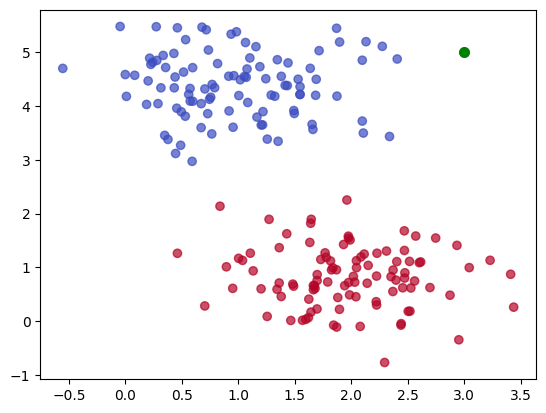

In [ ]:
t = test_dots[1]

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(t[0], t[1], c='g', linewidth=2)
print("Class of t: ", knn.classify(t, 10, print_distances=True))

dictance to 1 point: 0.5665552402628099 (class = 0)
dictance to 2 point: 0.7254464929145896 (class = 0)
dictance to 3 point: 0.9704205522425459 (class = 0)
dictance to 4 point: 1.3470706459175212 (class = 0)
dictance to 5 point: 1.5167873163376142 (class = 1)
dictance to 6 point: 1.5607856500173574 (class = 0)
dictance to 7 point: 1.9747820899665356 (class = 0)
dictance to 8 point: 2.040571939321556 (class = 1)
dictance to 9 point: 2.2163968603554083 (class = 0)
dictance to 10 point: 2.3607495642317806 (class = 0)
Class of t:  0


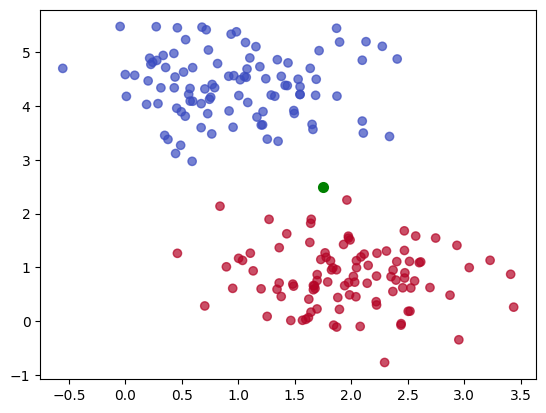

In [ ]:
t = test_dots[2]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7)   
plt.scatter(t[0], t[1], c='g', linewidth=2)
print("Class of t: ", knn.classify(t, 10, print_distances=True))